In [1]:
%matplotlib inline
import read_mist_models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Working with ISO files
#An .iso file is split into two types: basic and full. The basic .iso file contains 25 columns (e.g., initial mass, mass loss rate, effective temperature, 
#surface H1 abundance) and the full .iso file contains 79 columns (e.g., log(L/Ledd) at the surface, surface C13 abundance, pp-burning luminosity, 
#mass of the convective core) in addition to the 25 columns in the basic file type.

# An .iso.cmd file contains very basic "theory" columns such as the initial mass & effective temperature plus synthetic photometry.

In [3]:
#Read in the CMD file.
isocmd = read_mist_models.ISOCMD('MIST_iso_67f0218b46ba3.iso.cmd')

Reading in: MIST_iso_67f0218b46ba3.iso.cmd


In [4]:
#Check the available header information.
print('version: ', isocmd.version)
print('photometric system: ', isocmd.photo_sys)
print('abundances: ', isocmd.abun)
print('rotation: ', isocmd.rot)
print('ages: ', [round(x,2) for x in isocmd.ages])
print('number of ages: ', isocmd.num_ages)
print('available columns: ', isocmd.hdr_list)
print('Av extinction: ', isocmd.Av_extinction)

version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  UBV(RI)c, 2MASS, Kepler, Hipparcos, Gaia (Vega)
abundances:  {'Yinit': 0.2671, 'Zinit': 0.0120914, '[Fe/H]': -0.07, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Be

(-1.0, 5.0, 18.0, -7.0)

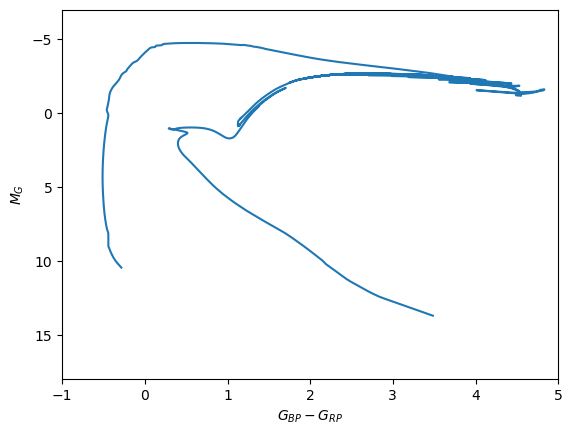

In [5]:
# Plot a CMD at log(age) = 9.6 in B & V bands.
age_ind = isocmd.age_index(9.04) #returns the index for the desired age
M_G = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
BP_RP = isocmd.isocmds[age_ind]['Gaia_BP_EDR3'] - isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
plt.plot(BP_RP, M_G)
plt.xlabel('$G_{BP}-G_{RP}$')
plt.ylabel('$M_G$')
plt.axis([-1, 5.0, 18, -7])